In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg as AR

from sklearn.cluster import DBSCAN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.mixture import GaussianMixture
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans

from sklearn import metrics
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder,MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from scipy.optimize import linear_sum_assignment

from sklearn.linear_model import SGDClassifier
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [60]:
df=pd.read_csv("dataset_sdn.csv")
df.head(10)

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0
5,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1402,0,0.0,0.0,0
6,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,4,3665,3413,0,0.0,0.0,0
7,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,1,3775,1492,0,0.0,0.0,0
8,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,2,3845,1402,0,0.0,0.0,0
9,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,4,354583059,4295,16578,0.0,16578.0,0


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104345 entries, 0 to 104344
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dt           104345 non-null  int64  
 1   switch       104345 non-null  int64  
 2   src          104345 non-null  object 
 3   dst          104345 non-null  object 
 4   pktcount     104345 non-null  int64  
 5   bytecount    104345 non-null  int64  
 6   dur          104345 non-null  int64  
 7   dur_nsec     104345 non-null  int64  
 8   tot_dur      104345 non-null  float64
 9   flows        104345 non-null  int64  
 10  packetins    104345 non-null  int64  
 11  pktperflow   104345 non-null  int64  
 12  byteperflow  104345 non-null  int64  
 13  pktrate      104345 non-null  int64  
 14  Pairflow     104345 non-null  int64  
 15  Protocol     104345 non-null  object 
 16  port_no      104345 non-null  int64  
 17  tx_bytes     104345 non-null  int64  
 18  rx_bytes     104345 non-

In [62]:
df.describe()

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
count,104345.000000,104345.000000,104345.000000,1.043450e+05,104345.000000,1.043450e+05,1.043450e+05,104345.000000,104345.000000,104345.000000,1.043450e+05,104345.000000,104345.000000,104345.000000,1.043450e+05,1.043450e+05,104345.000000,103839.000000,103839.000000,104345.000000
mean,17927.514169,4.214260,52860.954746,3.818660e+07,321.497398,4.613880e+08,3.218865e+11,5.654234,5200.383468,6381.715291,4.716150e+06,212.210676,0.600987,2.331094,9.325264e+07,9.328039e+07,998.899756,1003.811420,2007.578742,0.390857
std,11977.642655,1.956327,52023.241460,4.877748e+07,283.518232,2.770019e+08,2.834029e+11,2.950036,5257.001450,7404.777808,7.560116e+06,246.855123,0.489698,1.084333,1.519380e+08,1.330004e+08,2423.471618,2054.887034,3144.437173,0.487945
min,2488.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,2.000000,4.000000,-130933.000000,-1.464426e+08,-4365.000000,0.000000,1.000000,2.527000e+03,8.560000e+02,0.000000,0.000000,0.000000,0.000000
25%,7098.000000,3.000000,808.000000,7.957600e+04,127.000000,2.340000e+08,1.270000e+11,3.000000,1943.000000,29.000000,2.842000e+03,0.000000,0.000000,1.000000,4.743000e+03,3.539000e+03,0.000000,0.000000,0.000000,0.000000
50%,11905.000000,4.000000,42828.000000,6.471930e+06,251.000000,4.180000e+08,2.520000e+11,5.000000,3024.000000,8305.000000,5.521680e+05,276.000000,1.000000,2.000000,4.219610e+06,1.338339e+07,0.000000,0.000000,4.000000,0.000000
75%,29952.000000,5.000000,94796.000000,7.620354e+07,412.000000,7.030000e+08,4.130000e+11,7.000000,7462.000000,10017.000000,9.728112e+06,333.000000,1.000000,3.000000,1.356398e+08,1.439277e+08,251.000000,557.000000,3838.000000,1.000000
max,42935.000000,10.000000,260006.000000,1.471280e+08,1881.000000,9.990000e+08,1.880000e+12,17.000000,25224.000000,19190.000000,1.495387e+07,639.000000,1.000000,5.000000,1.269982e+09,9.905962e+08,20580.000000,16577.000000,20580.000000,1.000000


In [63]:
column_names=df.columns
column_names


Index(['dt', 'switch', 'src', 'dst', 'pktcount', 'bytecount', 'dur',
       'dur_nsec', 'tot_dur', 'flows', 'packetins', 'pktperflow',
       'byteperflow', 'pktrate', 'Pairflow', 'Protocol', 'port_no', 'tx_bytes',
       'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps', 'label'],
      dtype='object')

In [64]:
df.isnull().sum()

dt               0
switch           0
src              0
dst              0
pktcount         0
bytecount        0
dur              0
dur_nsec         0
tot_dur          0
flows            0
packetins        0
pktperflow       0
byteperflow      0
pktrate          0
Pairflow         0
Protocol         0
port_no          0
tx_bytes         0
rx_bytes         0
tx_kbps          0
rx_kbps        506
tot_kbps       506
label            0
dtype: int64

In [65]:
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103839 entries, 0 to 104344
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dt           103839 non-null  int64  
 1   switch       103839 non-null  int64  
 2   src          103839 non-null  object 
 3   dst          103839 non-null  object 
 4   pktcount     103839 non-null  int64  
 5   bytecount    103839 non-null  int64  
 6   dur          103839 non-null  int64  
 7   dur_nsec     103839 non-null  int64  
 8   tot_dur      103839 non-null  float64
 9   flows        103839 non-null  int64  
 10  packetins    103839 non-null  int64  
 11  pktperflow   103839 non-null  int64  
 12  byteperflow  103839 non-null  int64  
 13  pktrate      103839 non-null  int64  
 14  Pairflow     103839 non-null  int64  
 15  Protocol     103839 non-null  object 
 16  port_no      103839 non-null  int64  
 17  tx_bytes     103839 non-null  int64  
 18  rx_bytes     103839 non-null 

In [66]:
uniq_dest=df['dst'].unique()
total_dst=len(uniq_dest)
print("Total unique destination : ", total_dst)
print("Different destination :", uniq_dest)

Total unique destination :  18
Different destination : ['10.0.0.8' '10.0.0.7' '10.0.0.3' '10.0.0.5' '10.0.0.10' '10.0.0.13'
 '10.0.0.1' '10.0.0.11' '10.0.0.2' '10.0.0.4' '10.0.0.9' '10.0.0.6'
 '10.0.0.14' '10.0.0.15' '10.0.0.12' '10.0.0.16' '10.0.0.17' '10.0.0.18']


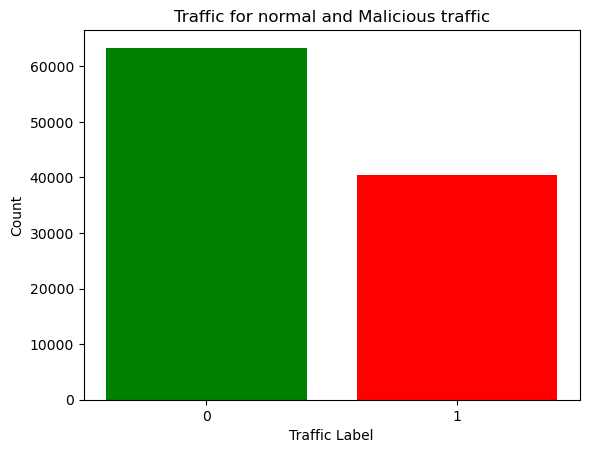

In [67]:
gp=df.groupby('label')['label'].count()
plt.bar(list(gp.index),list(gp.values),color=['g','r'])
plt.xticks(list(gp.index))
plt.xlabel("Traffic Label")
plt.ylabel("Count")
plt.title("Traffic for normal and Malicious traffic")
plt.show()

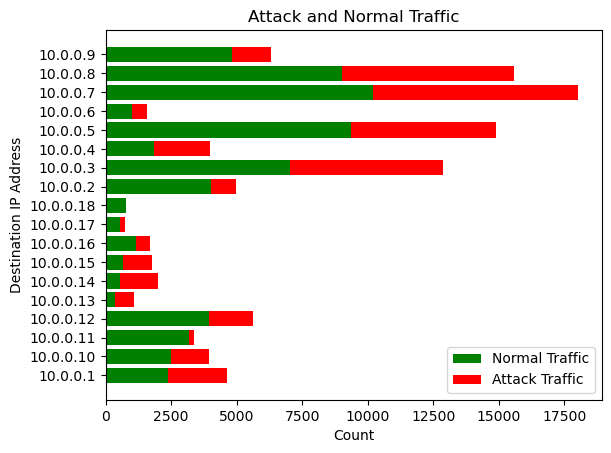

In [68]:
ip_addr=df[df['label']==0].groupby('dst').count()['label'].index
normal_traffic=df.groupby(['dst','label']).size().unstack().fillna(0)[0]
attack_traffic=df.groupby(['dst','label']).size().unstack().fillna(0)[1]
plt.barh(ip_addr, normal_traffic, color='g', label='Normal Traffic')
plt.barh(ip_addr, attack_traffic, left=normal_traffic, color='r', label='Attack Traffic')
plt.legend()
plt.xlabel("Count")
plt.ylabel("Destination IP Address")
plt.title("Attack and Normal Traffic")
plt.show()

In [69]:
object_col = list(df.select_dtypes(include=['object']).columns)
object_col=object_col+['port_no']
print(object_col)
data=df.drop(columns=object_col)


['src', 'dst', 'Protocol', 'port_no']


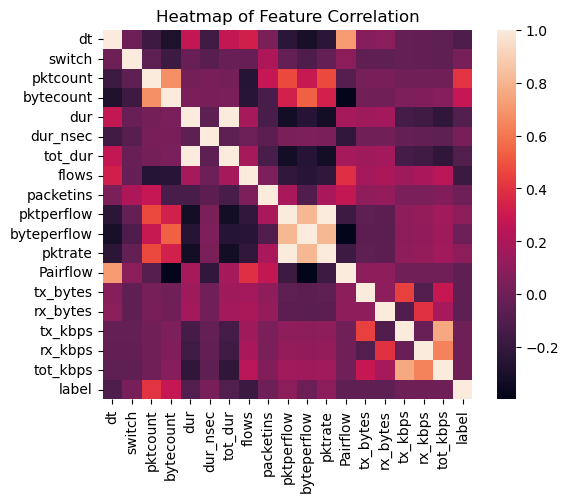

In [70]:
covar_matrix_original=data.corr()
col_names=data.columns
sns.heatmap(covar_matrix_original,cbar=True,square=True,xticklabels=col_names,yticklabels=col_names)
plt.title("Heatmap of Feature Correlation")
plt.show()

In [71]:
# Get correlation with the 'label' column
correlation_with_label = covar_matrix_original['label'].abs().sort_values(ascending=False)

# Drop label itself
correlation_with_label = correlation_with_label.drop('label')

# Display top N most correlated features
top_features = correlation_with_label.head(10)
print("Top Correlated Features:\n", top_features)



Top Correlated Features:
 pktcount      0.403217
bytecount     0.278051
flows         0.181510
dt            0.108798
tot_dur       0.098745
dur           0.098734
pktrate       0.089801
pktperflow    0.089608
rx_bytes      0.056578
tx_bytes      0.049302
Name: label, dtype: float64


In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

top_features = [ 'bytecount', 'flows', 'dt', 'dur', 
                'pktrate', 'pktperflow', 'rx_bytes', 'tx_bytes']
X = data[top_features]
y = data['label'] 

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 2: Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Train the classifier (Random Forest)
model = RandomForestClassifier(n_estimators=100, random_state=42,class_weight='balanced')
model.fit(X_train_scaled, y_train)

# Step 4: Predict and evaluate
y_pred = model.predict(X_test_scaled)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

Confusion Matrix:
[[12664     3]
 [    0  8101]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12667
           1       1.00      1.00      1.00      8101

    accuracy                           1.00     20768
   macro avg       1.00      1.00      1.00     20768
weighted avg       1.00      1.00      1.00     20768

ROC AUC Score: 0.99988158206363


In [73]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

# Step 4: Predict and evaluate
y_pred = knn_model.predict(X_test_scaled)

# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

Confusion Matrix:
[[12467   200]
 [  265  7836]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     12667
           1       0.98      0.97      0.97      8101

    accuracy                           0.98     20768
   macro avg       0.98      0.98      0.98     20768
weighted avg       0.98      0.98      0.98     20768

ROC AUC Score: 0.9757494654772321


In [74]:
# from sklearn.svm import SVC
# from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# # SVM model
# svm_model = SVC(kernel='rbf', probability=True)  # use 'probability=True' for ROC AUC
# svm_model.fit(X_train_scaled, y_train)

# # Predict
# y_pred_svm = svm_model.predict(X_test_scaled)

# # Evaluation
# print("SVM - Confusion Matrix:")
# print(confusion_matrix(y_test, y_pred_svm))

# print("\nSVM - Classification Report:")
# print(classification_report(y_test, y_pred_svm))

# # For binary classification, use predict_proba
# y_proba_svm = svm_model.predict_proba(X_test_scaled)[:, 1]
# print("SVM - ROC AUC Score:", roc_auc_score(y_test, y_proba_svm))


In [75]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_scaled, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test_scaled)


print("XGBoost - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

print("\nXGBoost - Classification Report:")
print(classification_report(y_test, y_pred_xgb))

y_proba_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]
print("XGBoost - ROC AUC Score:", roc_auc_score(y_test, y_proba_xgb))


XGBoost - Confusion Matrix:
[[12666     1]
 [    1  8100]]

XGBoost - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12667
           1       1.00      1.00      1.00      8101

    accuracy                           1.00     20768
   macro avg       1.00      1.00      1.00     20768
weighted avg       1.00      1.00      1.00     20768

XGBoost - ROC AUC Score: 0.9999999610194836


In [76]:
def test_ddos_model(model, scaler, test_data, feature_names):
  
    import numpy as np
    import pandas as pd

    # Convert to DataFrame for better readability
    test_df = pd.DataFrame(test_data, columns=feature_names)

    # Scale using same scaler as training
    test_scaled = scaler.transform(test_df)

    # Predict
    predictions = model.predict(test_scaled)

    for i, pred in enumerate(predictions):
        print(f"Test Case {i+1}: {'DDoS Attack' if pred == 1 else 'Normal Traffic'}")


In [84]:
test_cases = [

    # Case 1: Normal browsing
    [1200000, 300, 0.002, 15.0, 100.0, 5.0, 600000, 600000],

    # Case 2: Normal browsing (slightly heavier)
    [1800000, 420, 0.0015, 20.0, 110.0, 5.2, 900000, 900000],

    # Case 3: Small file transfer
    [5000000, 150, 0.002, 35.0, 100.0, 23.3, 2500000, 2500000],

    # Case 4: Video streaming
    [30000000, 600, 0.001, 60.0, 166.67, 16.6, 15000000, 15000000],
    [1500000, 350, 0.002, 10.0, 150.0, 4.3, 750000, 750000],
    
    # File transfer (upload)
    [4000000, 120, 0.003, 25.0, 160.0, 29.1, 0, 4000000],
    
    # Video streaming
    [25000000, 500, 0.0012, 60.0, 150.0, 20.0, 12500000, 12500000],
    
    # Email sync (low flow count)
    [500000, 20, 0.004, 30.0, 16.6, 75.0, 250000, 250000],
    
    # DNS queries burst
    [900000, 900, 0.0009, 15.0, 100.0, 1.0, 450000, 450000],

    # UDP flood: high pktrate, low pktperflow
    [3200000, 100, 0.01, 1.0, 8000.0, 80.0, 1600000, 1600000],

    # SYN flood: many flows, 1-2 packets per flow
    [6500000, 30000, 0.00001, 0.5, 130000.0, 2.0, 0, 6500000],

    # ICMP flood
    [1800000, 200, 0.0005, 0.8, 2250.0, 9.0, 0, 1800000],

    # DNS Amplification attack
    [30000000, 40, 0.002, 2.0, 15000.0, 750.0, 29000000, 1000000],

    # Mixed flood from botnet
    [5000000, 5000, 0.0002, 3.0, 1666.7, 1.0, 0, 5000000],

]


# Call the function
test_ddos_model(knn_model, scaler, test_cases, top_features)

Test Case 1: Normal Traffic
Test Case 2: Normal Traffic
Test Case 3: Normal Traffic
Test Case 4: Normal Traffic
Test Case 5: Normal Traffic
Test Case 6: Normal Traffic
Test Case 7: Normal Traffic
Test Case 8: Normal Traffic
Test Case 9: Normal Traffic
Test Case 10: DDoS Attack
Test Case 11: DDoS Attack
Test Case 12: DDoS Attack
Test Case 13: DDoS Attack
Test Case 14: DDoS Attack


In [85]:
from joblib import dump

In [ ]:
dump(knn_model, 'ddos_rf_model.pkl')

# Save the scaler
dump(scaler, 'scaler.pkl')